## Importing packages and reading data

In [1]:
import math 
import numpy as np
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Chem.AllChem import GenerateDepictionMatching3DStructure as Struct_3D
from rdkit.ForceField.rdForceField import MMFFMolProperties as properties
import rdkit.Chem.Draw as draw

from itertools import zip_longest
# from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('temp_cleaned_data.tsv',sep='\t')
# df = df.set_index('#')
df.head(3)

,#,Name,name_smiles,Wavelength,Epsilon,Quantum Yield
0,1,Benzene,C1=CC=CC=C1,254.75,210,0.053
1,2,Toluene,CC1=CC=CC=C1,261.75,"2,860",0.170
2,3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170


In [3]:
num_atoms = []
for indexi, rowi in df.iterrows():
    smiles = df.name_smiles[indexi]
    molecule = Chem.MolFromSmiles(smiles)
    num_atoms.append(molecule.GetNumAtoms())
df['num_atoms'] = num_atoms
df = df.set_index('#')
df.head(3)

,Name,name_smiles,Wavelength,Epsilon,Quantum Yield,num_atoms
#,,,,,,
1,Benzene,C1=CC=CC=C1,254.75,210,0.053,6
2,Toluene,CC1=CC=CC=C1,261.75,"2,860",0.170,7
3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170,8


## Generating a Coulomb matrix for benzene

In [20]:
# Defining the SMILES string from df
# benz_smiles = 'C1=CC2=C3C(=C(C=C2S(=O)(=O)[O-])S(=O)(=O)[O-])C=CC4=C(C=C(C1=C43)O)S(=O)(=O)[O-].[Na+].[Na+].[Na+]'
benz_smiles = '[CH-]1C=CC=C1.[CH-]1C=CC=C1.[Fe+2]'
# Building the benzene molecule
benz = Chem.MolFromSmiles(benz_smiles)
benz.GetNumAtoms()

11

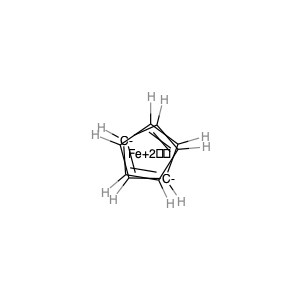

In [21]:
# Defining the SMILES string from df
#benz_smiles = df.name_smiles[1]
# Building the benzene molecule and ADDING HYDROGENS
benz = Chem.AddHs(Chem.MolFromSmiles(benz_smiles))
# 'Embedding' the molecule to assign coordinates to nuclei
AllChem.EmbedMolecule(benz)
# Optimising the molecule
AllChem.MMFFOptimizeMolecule(benz)
# Generating universal force field model
ff1 = AllChem.UFFGetMoleculeForceField(benz)
# Getting the positions of nuclei; returned as a tuple of the form (x1, y1, z1, x2, y2, z2, x3, ...)
pos1 = ff1.Positions()
# Drawing the molecule
draw.MolToImage(benz, kekulize=False) # can also use .MolToFile to save to a file

In [ ]:
benz_type = benz_H.GetAtoms()

In [ ]:
benz_H.GetNumAtoms()

In [ ]:
benz_type = []
for atom in benz_H.GetAtoms():
    benz_type.append(atom.GetAtomicNum())
#     print(atom.GetAtomicNum())
benz_type

In [ ]:
def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)

In [ ]:
import matplotlib.pyplot as plt
x = []
y = []
z = []

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
for item1, item2, item3 in grouper(3, pos2):
    x.append(item1)
    y.append(item2)
    z.append(item3)
#     ax.scatter(item1, item2, item3)

In [ ]:
benz_df = pd.DataFrame()
benz_df['charge'] = benz_type
benz_df['x'] = x
benz_df['y'] = y
benz_df['z'] = z
# benz_df.index += 1

benz_df

In [ ]:
def get_coulomb_matrix(molecule_df)
    num_atoms = len(molecule_df)
    coulomb = np.zeros(shape=(num_atoms,num_atoms))
    for indexi, rowi in benz_df.iterrows():
        for indexj, rowj in benz_df.iterrows():
            Zi = rowi.charge
            xi = rowi.x
            yi = rowi.y
            zi = rowi.z
            Zj = rowj.charge
            xj = rowj.x
            yj = rowj.y
            zj = rowj.z
            if indexi == indexj:
                element = 0.5 * math.pow(Zi, 2.4)
            else:
                norm_diff = math.sqrt(math.pow((xi-xj),2) + math.pow((yi-yj),2) + math.pow((zi-zj),2))
                element = Zi * Zj / norm_diff
            coulomb[indexi][indexj] = element
            
    return coulomb

In [3]:
import utilities
from spDescriptors import spDescriptors as spD

In [4]:
benzene = spD(df.name_smiles[0])

In [5]:
benz_coulomb = benzene.get_coulomb_matrix()

array([[ 5.52115011,  2.78473361,  1.76432448,  1.54783495,  1.76432423,
         2.78473313,  0.5       ,  0.40297283,  0.23265655,  0.20148648,
         0.23265651,  0.40297279],
       [ 1.76432449,  2.78473371,  5.52115091,  2.78473459,  1.76432492,
         1.54783527,  0.23265655,  0.40297311,  0.5       ,  0.40297319,
         0.23265662,  0.20148651],
       [ 1.54783502,  1.76432469,  2.78473448,  5.52115101,  2.78473366,
         1.76432444,  0.20148648,  0.23265662,  0.40297319,  0.5       ,
         0.40297304,  0.23265657],
       [ 2.78473308,  1.7643244 ,  1.54783523,  1.76432466,  2.78473404,
         5.52115038,  0.40297279,  0.23265651,  0.20148651,  0.23265657,
         0.40297297,  0.5       ],
       [ 1.76432426,  1.54783517,  1.7643249 ,  2.78473453,  5.52115064,
         2.78473317,  0.23265651,  0.2014865 ,  0.23265662,  0.40297304,
         0.5       ,  0.40297297],
       [ 2.784733  ,  5.52115073,  2.78473462,  1.76432478,  1.54783518,
         1.76432435,  